####Cost / Payment Analysis:

1. Summary Table (Averages)
2. Averages Through the Day
3. Averages Throughout the Month
4. Trip Distance vs Average Fair (Daily Average)
5.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

file_path = '/content/drive/MyDrive/(3439) Data Science/Projects/project1_wradigk/nyc_taxi_data_cleaned.csv'

In [2]:
df_main = pd.read_csv(file_path, low_memory=False)

# Drop Unnecessary Columns
df_main = df_main.drop(columns=['Unnamed: 0', 'extra', 'improvement_surcharge', 'VendorID'])

# No line wrapping
pd.set_option('display.width', None)

# No limit on columns
pd.set_option('display.max_columns', None)

In [3]:
# Run this cell to reset df
df = df_main
df.head()

,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,Pickup_Borough,DOLocationID,Dropoff_Borough,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,congestion_surcharge,airport_fee,total_amount
0,2022-01-01 00:35:40,Saturday,12:35 AM,2022-01-01 00:53:29,Saturday,12:53 AM,2,3.80,1,N,142,Manhattan,236,Manhattan,1,14.5,0.5,3.65,0.0,2.5,0.0,21.95
1,2022-01-01 00:33:43,Saturday,12:33 AM,2022-01-01 00:42:07,Saturday,12:42 AM,1,2.10,1,N,236,Manhattan,42,Manhattan,1,8.0,0.5,4.00,0.0,0.0,0.0,13.30
2,2022-01-01 00:53:21,Saturday,12:53 AM,2022-01-01 01:02:19,Saturday,01:02 AM,1,0.97,1,N,166,Manhattan,166,Manhattan,1,7.5,0.5,1.76,0.0,0.0,0.0,10.56
3,2022-01-01 00:25:21,Saturday,12:25 AM,2022-01-01 00:35:23,Saturday,12:35 AM,1,1.09,1,N,114,Manhattan,68,Manhattan,2,8.0,0.5,0.00,0.0,2.5,0.0,11.80
4,2022-01-01 00:36:48,Saturday,12:36 AM,2022-01-01 01:14:20,Saturday,01:14 AM,1,4.30,1,N,68,Manhattan,163,Manhattan,1,23.5,0.5,3.00,0.0,2.5,0.0,30.30




```
Summary Table (Averages)
```



In [4]:
summary_series = pd.Series({
    "Average Fare ($)": df["fare_amount"].mean(),
    "Average Toll ($)": df["tolls_amount"].mean(),
    "Average Tip ($)": df["tip_amount"].mean(),  # Remove if avoiding tips
    "Cash Payments (%)": df["payment_type"].value_counts(normalize=True).get(2, 0) * 100,  # Assuming 2 = Cash
    "Credit Payments (%)": df["payment_type"].value_counts(normalize=True).get(1, 0) * 100  # Assuming 1 = Credit
})

summary_series.round(2)

,0
Average Fare ($),12.95
Average Toll ($),0.38
Average Tip ($),2.39
Cash Payments (%),20.11
Credit Payments (%),76.08




```
Averages Through the Day
```



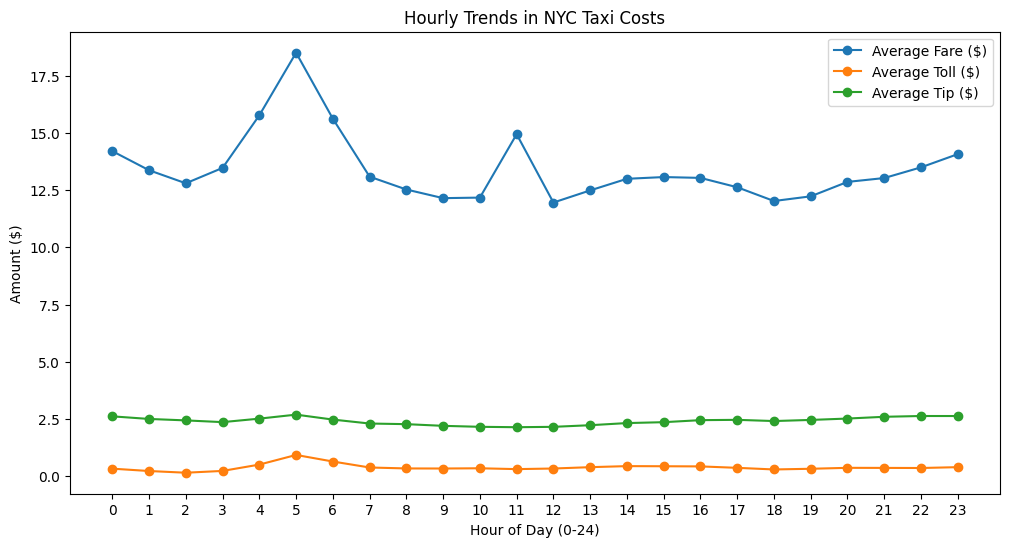

In [5]:
# Convert pickup datetime to hour
df["hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Group by hour and compute averages
hourly_avg = df.groupby("hour").agg({
    "fare_amount": "mean",
    "tolls_amount": "mean",
    "tip_amount": "mean"
})

# Rename columns for clarity
hourly_avg.columns = ["Average Fare ($)", "Average Toll ($)", "Average Tip ($)"]

# Plot
plt.figure(figsize=(12, 6))

# Plot each column
for column in hourly_avg.columns:
    plt.plot(hourly_avg.index, hourly_avg[column], marker="o", label=column)

plt.xlabel("Hour of Day (0-24)")
plt.ylabel("Amount ($)")
plt.title("Hourly Trends in NYC Taxi Costs")
plt.xticks(range(0, 24))  # Show all hours
plt.legend()
plt.grid(False)  # Remove grid lines
plt.show()



```
Averages Throughout the Month
```



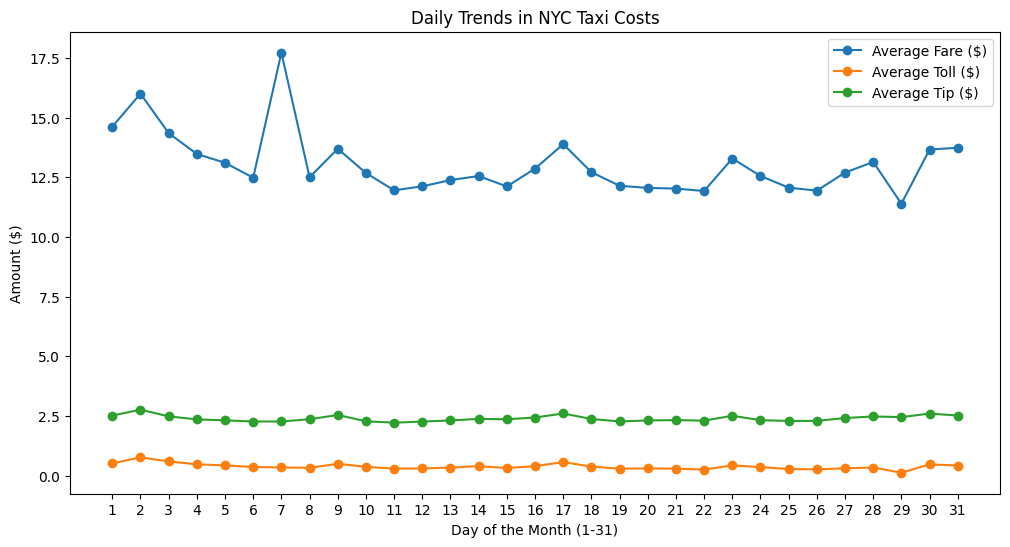

In [6]:
# Convert pickup datetime to day of the month
df["day"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.day

# Group by day and compute averages
daily_avg = df.groupby("day").agg({
    "fare_amount": "mean",
    "tolls_amount": "mean",
    "tip_amount": "mean"
})

# Rename columns for clarity
daily_avg.columns = ["Average Fare ($)", "Average Toll ($)", "Average Tip ($)"]

# Plot
plt.figure(figsize=(12, 6))

# Plot each column
for column in daily_avg.columns:
    plt.plot(daily_avg.index, daily_avg[column], marker="o", label=column)

plt.xlabel("Day of the Month (1-31)")
plt.ylabel("Amount ($)")
plt.title("Daily Trends in NYC Taxi Costs")
plt.xticks(range(1, 32))  # Show all days (1-31)
plt.legend()
plt.grid(False)  # Remove grid lines
plt.show()



```
Trip Distance vs Average Fair (Daily Average)
```



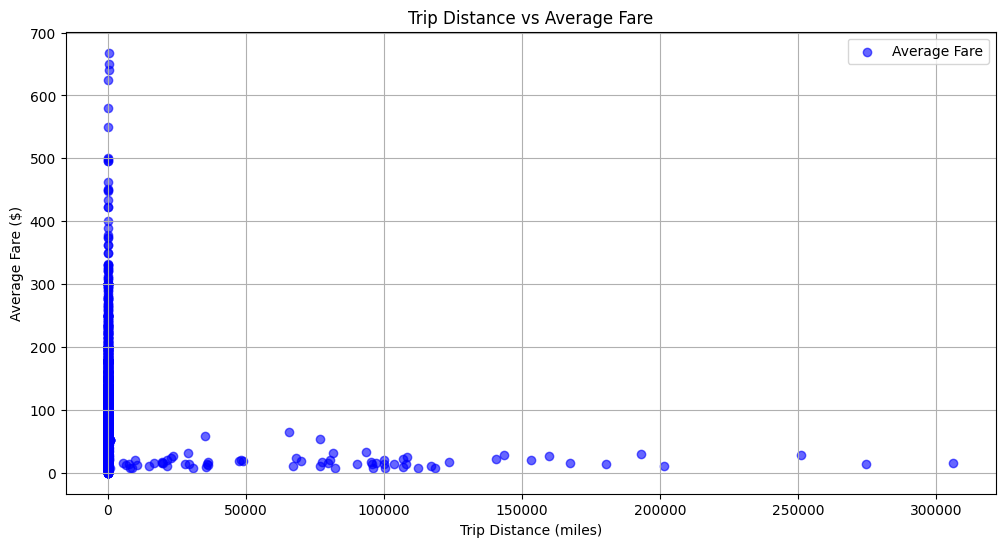

In [7]:
# Group by trip distance and calculate average fare
avg_fare_by_trip_distance = df.groupby("trip_distance")["fare_amount"].mean().reset_index()

# Plot scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(avg_fare_by_trip_distance["trip_distance"], avg_fare_by_trip_distance["fare_amount"],
            color="b", label="Average Fare", alpha=0.6)

# Labels & formatting
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Fare ($)")
plt.title("Trip Distance vs Average Fare")
plt.grid(True)
plt.legend()
plt.show()

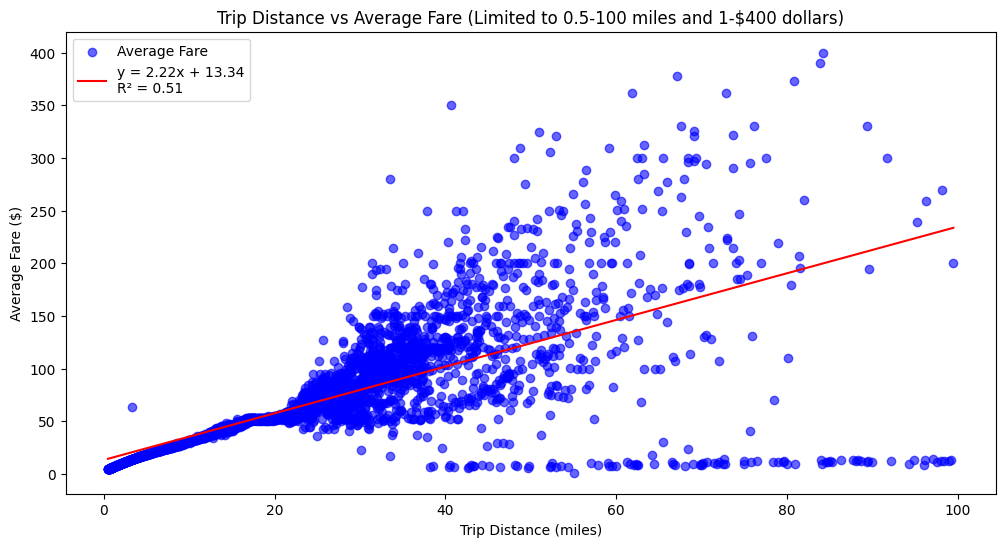

In [9]:
# Set a trip distance limit, average fare limit, and their minimum values
distance_limit = 100
distance_min_limit = 0.5  # Minimum trip distance (in miles)
fare_limit = 400
fare_min_limit = 1      # Minimum fare amount (in dollars)

# Filter out data that exceeds the limits and also below the minimum values
filtered_data = avg_fare_by_trip_distance[
    (avg_fare_by_trip_distance["trip_distance"] <= distance_limit) &
    (avg_fare_by_trip_distance["trip_distance"] >= distance_min_limit) &  # Minimum trip distance
    (avg_fare_by_trip_distance["fare_amount"] <= fare_limit) &
    (avg_fare_by_trip_distance["fare_amount"] >= fare_min_limit)  # Minimum fare amount
]

# Fit a linear regression (1st-degree polynomial) to the filtered data
m, b = np.polyfit(filtered_data["trip_distance"], filtered_data["fare_amount"], 1)

# Calculate R² for the filtered data
y_pred = m * filtered_data["trip_distance"] + b
ss_res = np.sum((filtered_data["fare_amount"] - y_pred) ** 2)
ss_tot = np.sum((filtered_data["fare_amount"] - np.mean(filtered_data["fare_amount"])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data["trip_distance"], filtered_data["fare_amount"],
            color="b", label="Average Fare", alpha=0.6)

# Regression line
plt.plot(filtered_data["trip_distance"],
         y_pred,
         color="red", label=f"y = {m:.2f}x + {b:.2f}\nR² = {r_squared:.2f}")

# Labels & formatting
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Fare ($)")
plt.title(f"Trip Distance vs Average Fare (Limited to {distance_min_limit}-{distance_limit} miles and {fare_min_limit}-${fare_limit} dollars)")
plt.legend()

# Remove grid lines
plt.grid(False)

# Display the plot
plt.show()


Number of Passengers vs Avergage Fare (Daily Average)

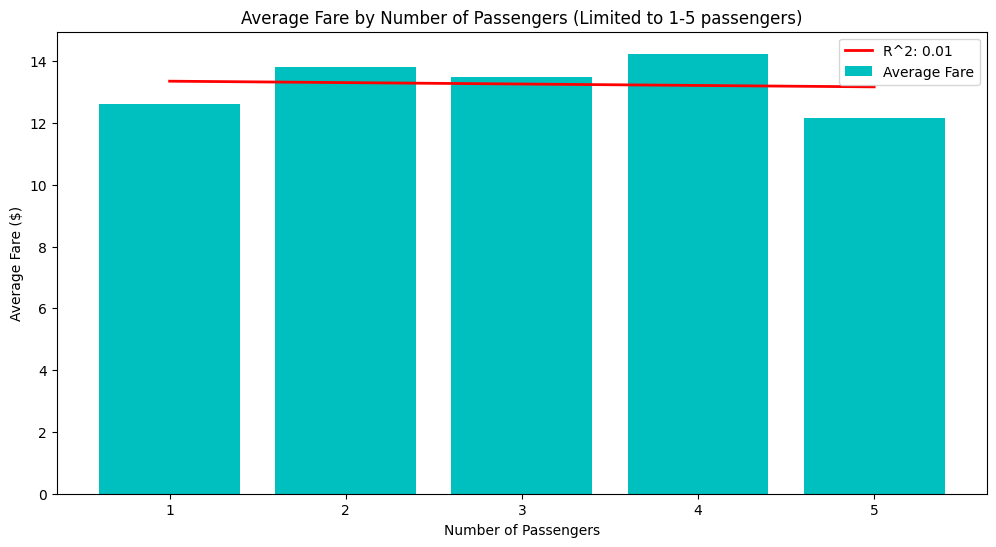

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

passenger_avg_fare = df.groupby("passenger_count", as_index=False)["fare_amount"].mean()

# Drop missing values
passenger_avg_fare = passenger_avg_fare.dropna(subset=["passenger_count", "fare_amount"])

# Convert passenger_count to integer (if necessary)
passenger_avg_fare["passenger_count"] = passenger_avg_fare["passenger_count"].astype(int)

# Set a passenger count limit (both minimum and maximum)
passenger_min_limit = 1  # Minimum passenger count
passenger_max_limit = 5  # Maximum passenger count

# Filter the data based on the passenger count limits
filtered_data = passenger_avg_fare[
    (passenger_avg_fare["passenger_count"] >= passenger_min_limit) &
    (passenger_avg_fare["passenger_count"] <= passenger_max_limit)
]

# Check if filtered_data is empty
if filtered_data.empty:
    print("No data available in the selected passenger range.")
else:
    # Prepare the filtered data for linear regression
    X_filtered = filtered_data["passenger_count"].values.reshape(-1, 1)  # Feature: passenger_count
    y_filtered = filtered_data["fare_amount"].values  # Target: fare_amount

    # Fit the model with filtered data
    model = LinearRegression()
    model.fit(X_filtered, y_filtered)

    # Predict the values
    y_pred_filtered = model.predict(X_filtered)

    # Calculate R^2 value for the filtered data
    r_squared_filtered = r2_score(y_filtered, y_pred_filtered)

    # Plot the graph
    plt.figure(figsize=(12, 6))
    plt.plot(
        filtered_data["passenger_count"], y_pred_filtered,
        color="red", label=f"R^2: {r_squared_filtered:.2f}", linewidth=2
    )
    plt.bar(
        filtered_data["passenger_count"], filtered_data["fare_amount"],
        color="c", label="Average Fare"
    )

    plt.xlabel("Number of Passengers")
    plt.ylabel("Average Fare ($)")
    plt.title(
        f"Average Fare by Number of Passengers (Limited to {passenger_min_limit}-{passenger_max_limit} passengers)"
    )

    # Ensure x-axis includes all relevant passenger counts
    plt.xticks(range(passenger_min_limit, filtered_data["passenger_count"].max() + 1))

    plt.legend()
    plt.show()

Map of Start Location vs Average Fare

In [13]:
from shapely import wkt

#Convert the 'the_geom' column into actual geometic shapes
file_path = '/content/drive/MyDrive/(3439) Data Science/Projects/project1_wradigk/nyc_taxi_data_raw.csv'
NYC_Taxi_Zones = pd.read_csv(file_path, low_memory=False)
NYC_Taxi_Zones['geometry'] = NYC_Taxi_Zones['the_geom'] = NYC_Taxi_Zones['the_geom'].apply(wkt.loads)

#Create a GeoDataFrame with the geometry column
geo_taxi_zones = gpd.GeoDataFrame(
    NYC_Taxi_Zones, geometry='geometry', crs='EPSG:4326'
)

#Drop the original 'the_geom' column if no longer needed
geo_taxi_zones = geo_taxi_zones.drop(columns=['the_geom'])

# geo_taxi_zones.head()

In [14]:
#Function to quickly plot the various maps used in the locational analysis

def plot_geo_borough(geo_df, data_df, borough, column_to_fill, min_percent=1,
                     fill_color='Oranges', title='Map of NYC Borough'):
    """
    Plot a map of NYC boroughs, focusing on a specific borough and coloring the taxi zones based on a data column.

    Parameters:
    - geo_df (GeoDataFrame): GeoDataFrame containing NYC Taxi Zone geometries.
    - data_df (DataFrame): DataFrame with aggregated data to map.
    - borough (str): Name of the borough to filter for (e.g., "Manhattan").
    - column_to_fill (str): Name of the column in `data_df` to use for coloring.
    - min_percent (float): minimum percentage threshold for including zones (default is 1%)
    - fill_color (str): Color scheme for the map (default is "Oranges").
    - title (str): Title for the map (default is "Map of NYC Borough").


    Returns:
    - A matplotlib plot showing the borough's taxi zones colored by the specified column.
    """
    import matplotlib.pyplot as plt

    # Filter GeoDataFrame for the specified borough
    borough_geo = geo_df[geo_df['borough'] == borough]

    # Merge the GeoDataFrame with the data DataFrame
    merged_geo = borough_geo.merge(
        data_df,
        how='left',
        on='LocationID'
    )

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_geo.boundary.plot(ax=ax, linewidth=0.8)  # Outline the zones
    merged_geo.plot(
        column=column_to_fill,
        cmap=fill_color,
        legend=True,
        ax=ax,
        missing_kwds={"color": "lightgrey", "label": "No data"}
    )

    # Customize the map
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    plt.show()

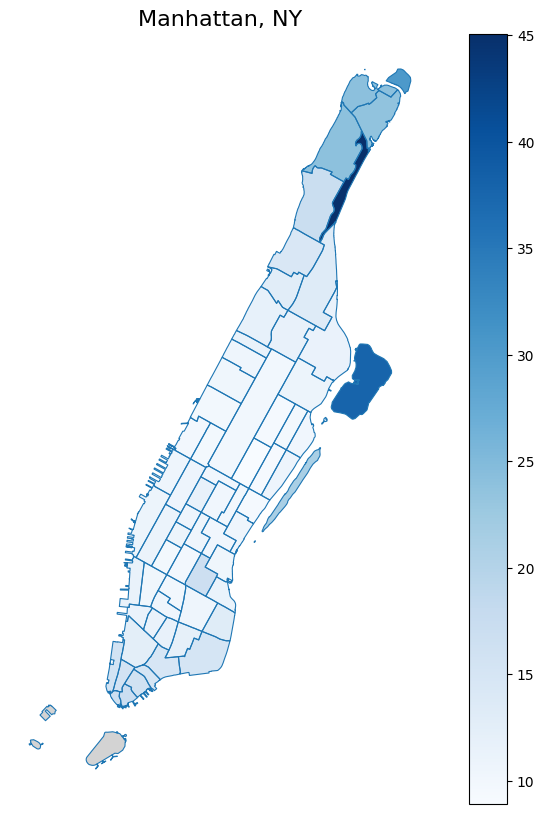

In [15]:
df_avg_fare = df.groupby("PULocationID", as_index=False)["fare_amount"].mean()
df_avg_fare.rename(columns={"PULocationID": "LocationID"}, inplace=True)
plot_geo_borough(geo_taxi_zones, df_avg_fare, "Manhattan", "fare_amount", 1, "Blues", "Manhattan, NY")

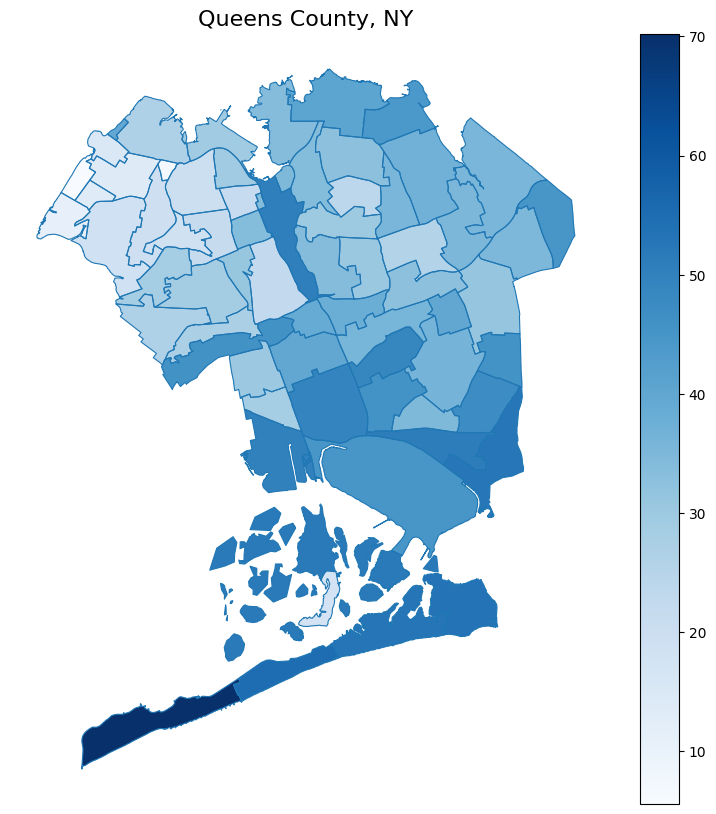

In [16]:
df_avg_fare = df.groupby("PULocationID", as_index=False)["fare_amount"].mean()
df_avg_fare.rename(columns={"PULocationID": "LocationID"}, inplace=True)
plot_geo_borough(geo_taxi_zones, df_avg_fare, "Queens", "fare_amount", 1, "Blues", "Queens County, NY")

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_by_pu = {}  # Store R² for each PULocationID

for loc_id, group in df.groupby("PULocationID"):
    if len(group) > 10:  # Ensure enough data points for regression
        X = group[["trip_distance"]].values
        y = group["fare_amount"].values

        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        r2_by_pu[loc_id] = r2_score(y, y_pred)

# Convert to DataFrame for analysis
r2_pu_df = pd.DataFrame(list(r2_by_pu.items()), columns=["PULocationID", "R²"])
avg_r2_pu = r2_pu_df["R²"].mean()
avg_r2_pu.round(2)

0.29

Map of Drop Off Location vs Average Fare

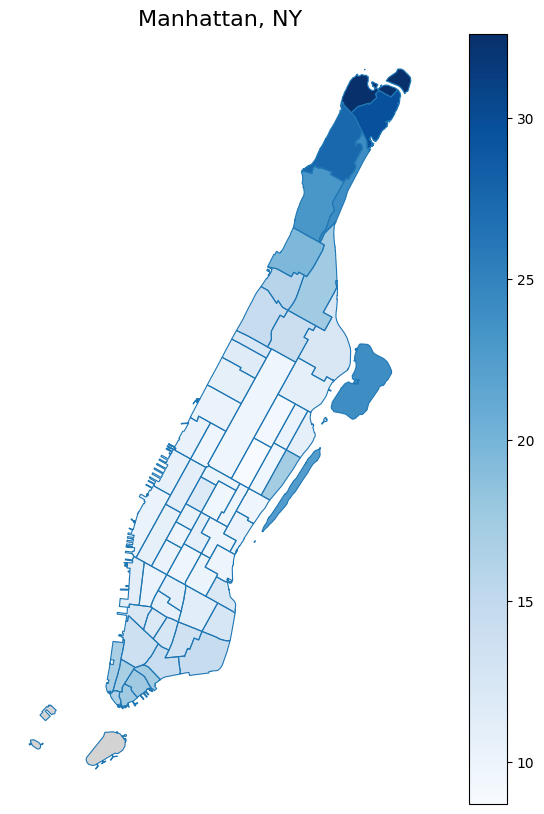

In [18]:
df_avg_fare = df.groupby("DOLocationID", as_index=False)["fare_amount"].mean()
df_avg_fare.rename(columns={"DOLocationID": "LocationID"}, inplace=True)
plot_geo_borough(geo_taxi_zones, df_avg_fare, "Manhattan", "fare_amount", 1, "Blues", "Manhattan, NY")

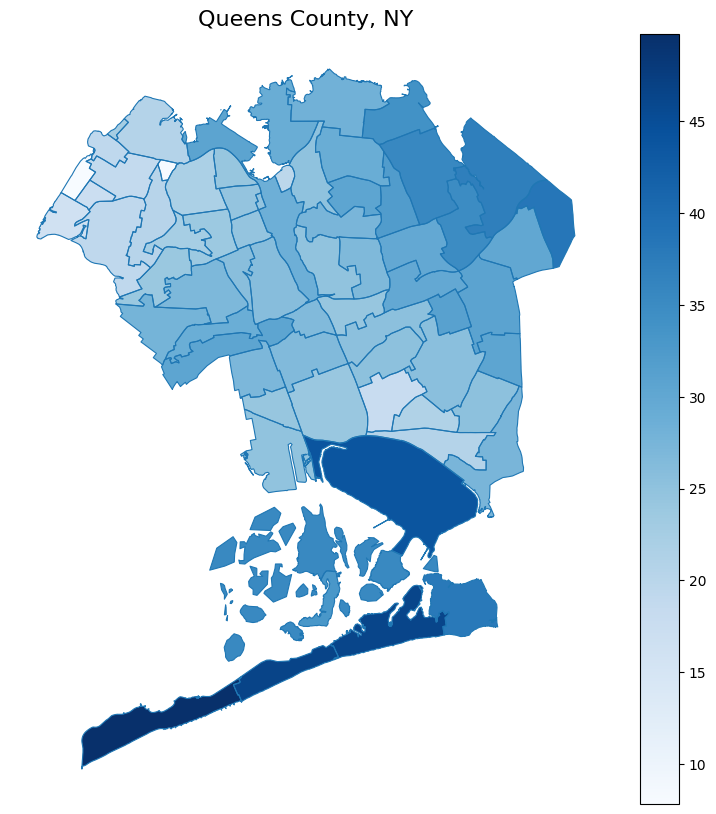

In [19]:
df_avg_fare = df.groupby("DOLocationID", as_index=False)["fare_amount"].mean()
df_avg_fare.rename(columns={"DOLocationID": "LocationID"}, inplace=True)
plot_geo_borough(geo_taxi_zones, df_avg_fare, "Queens", "fare_amount", 1, "Blues", "Queens County, NY")

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_by_pu = {}  # Store R² for each PULocationID

for loc_id, group in df.groupby("DOLocationID"):
    if len(group) > 10:  # Ensure enough data points for regression
        X = group[["trip_distance"]].values
        y = group["fare_amount"].values

        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        r2_by_pu[loc_id] = r2_score(y, y_pred)

# Convert to DataFrame for analysis
r2_pu_df = pd.DataFrame(list(r2_by_pu.items()), columns=["PULocationID", "R²"])
avg_r2_pu = r2_pu_df["R²"].mean()
avg_r2_pu.round(2)

0.4

Pie Chart of Influences on Average Fair

In [ ]:
# Data (rearrange to ensure labels and sizes match)
labels = ['Trip Distance', 'Drop Off Location', 'Pick Up Location', 'Passenger Count']
sizes = [51, 40, 24, 0]  # R^2 values as percentages

# Sort data by sizes in descending order
sorted_data = sorted(zip(sizes, labels), reverse=True)
sizes, labels = zip(*sorted_data)  # Unzip sorted data

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color='#66b3ff', edgecolor='black')

# Adding labels and title
plt.xlabel('Factors')
plt.ylabel('Percentage of Variation Explained (%)')
plt.title('Percentage of Fare Variation Explained by Different Factors')

# Rotate x-axis labels
# plt.xticks(rotation=45, ha='right', va='top')

# Display the plot
plt.show()